In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore") 

In [46]:
df=pd.read_csv('Clean_water_data.csv')

In [47]:
df.head()

,Unnamed: 0,STATION CODE,LOCATIONS,STATE,Temp,DO,PH,Conductivity,BOD,NI,Fec_col,Tot_col,year,WQI,WQI clf
0,0,1393,"DAMANGANGA AT D/S OF MADHUBAN, DAMAN",DAMAN & DIU,30.6,6.7,7.5,203.0,1.8965,0.1,11.0,27.0,2014.0,63.778321,1
1,1,1399,ZUARI AT D/S OF PT. WHERE KUMBARJRIA CANAL JOI...,GOA,29.8,5.7,7.2,189.0,2.0000,0.2,4953.0,8391.0,2014.0,175.363506,0
2,2,1475,ZUARI AT PANCHAWADI,GOA,29.5,6.3,6.9,179.0,1.7000,0.1,3243.0,5330.0,2014.0,126.135831,0
3,3,3181,RIVER ZUARI AT BORIM BRIDGE,GOA,29.7,5.8,6.9,64.0,3.8000,0.5,5382.0,8443.0,2014.0,195.105659,0
4,4,3182,RIVER ZUARI AT MARCAIM JETTY,GOA,29.5,5.8,7.3,83.0,1.9000,0.4,3428.0,5500.0,2014.0,141.393246,0


In [48]:
df.columns

Index(['Unnamed: 0', 'STATION CODE', 'LOCATIONS', 'STATE', 'Temp', 'DO', 'PH',
       'Conductivity', 'BOD', 'NI', 'Fec_col', 'Tot_col', 'year', 'WQI',
       'WQI clf'],
      dtype='object')

In [49]:
df.shape

(1857, 15)

In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1857 entries, 0 to 1856
Data columns (total 15 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Unnamed: 0    1857 non-null   int64  
 1   STATION CODE  1857 non-null   int64  
 2   LOCATIONS     1857 non-null   object 
 3   STATE         1857 non-null   object 
 4   Temp          1857 non-null   float64
 5   DO            1857 non-null   float64
 6   PH            1857 non-null   float64
 7   Conductivity  1857 non-null   float64
 8   BOD           1857 non-null   float64
 9   NI            1857 non-null   float64
 10  Fec_col       1857 non-null   float64
 11  Tot_col       1857 non-null   float64
 12  year          1857 non-null   float64
 13  WQI           1857 non-null   float64
 14  WQI clf       1857 non-null   int64  
dtypes: float64(10), int64(3), object(2)
memory usage: 217.7+ KB


Drop unrevelant features

In [51]:
df.drop(['Unnamed: 0','STATION CODE','LOCATIONS','STATE','year'],axis=1,inplace=True)

In [52]:
df.isnull().sum()

Temp            0
DO              0
PH              0
Conductivity    0
BOD             0
NI              0
Fec_col         0
Tot_col         0
WQI             0
WQI clf         0
dtype: int64

In [53]:
df['WQI clf'].value_counts()

0    877
1    691
2    286
3      3
Name: WQI clf, dtype: int64

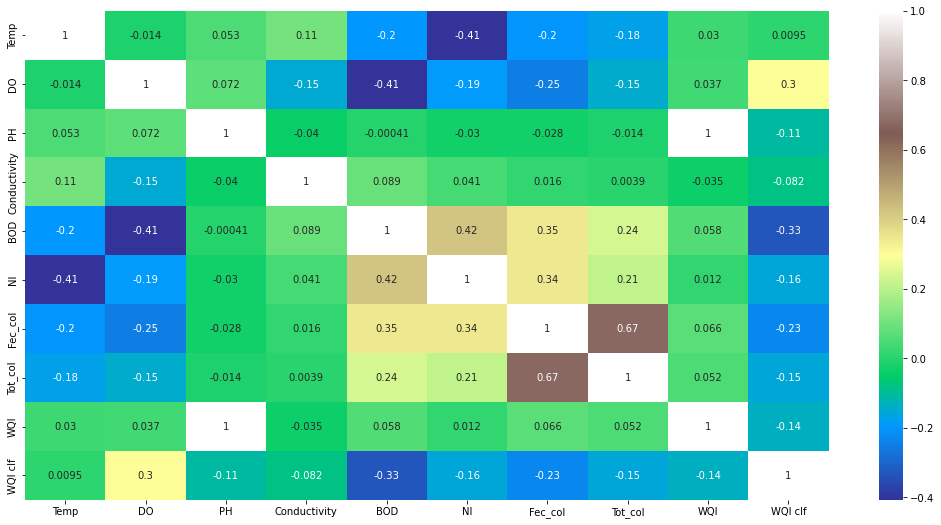

In [20]:
plt.figure(figsize=(18, 9))
sns.heatmap(df.corr(), annot=True, cmap='terrain')
plt.show()

In [22]:
df.drop(['WQI','Fec_col','Tot_col'],axis=1,inplace=True)

In [54]:
df.shape

(1857, 10)

### Split the x and y

In [63]:
x=df.drop(['WQI clf'],axis=1)

In [64]:
y=df['WQI clf']

In [65]:
x.shape,y.shape

((1857, 9), (1857,))

### Split the data into train and test

In [66]:
from sklearn.model_selection import train_test_split

In [67]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=48)

In [68]:
x_train.shape,x_test.shape,y_train.shape,y_test.shape

((1485, 9), (372, 9), (1485,), (372,))

### Fit and Train the Model

In [69]:
from sklearn.ensemble import RandomForestClassifier

In [70]:
rf=RandomForestClassifier()

In [71]:
rf.fit(x_train,y_train)

RandomForestClassifier()

In [72]:
prd=rf.predict(x_test)

In [73]:
prd

array([0, 1, 0, 1, 0, 0, 2, 1, 0, 2, 1, 1, 0, 2, 0, 2, 1, 2, 0, 1, 0, 1,
       0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 2, 2,
       0, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 0,
       2, 0, 0, 2, 2, 0, 1, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 0, 0, 0, 0, 1,
       1, 0, 1, 2, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 2, 0, 0,
       1, 1, 1, 0, 2, 0, 0, 0, 0, 1, 1, 1, 0, 2, 0, 0, 0, 1, 0, 2, 1, 1,
       1, 1, 1, 0, 2, 1, 0, 0, 0, 1, 0, 0, 1, 0, 2, 1, 0, 0, 0, 2, 2, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 2, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 2, 0, 1, 0, 0,
       2, 0, 2, 2, 0, 0, 0, 2, 0, 1, 1, 2, 2, 2, 1, 0, 0, 0, 0, 1, 0, 2,
       0, 2, 2, 1, 2, 1, 0, 1, 1, 1, 1, 1, 2, 1, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 1, 3, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 2,
       0, 1, 0, 1, 2, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 2, 1, 1, 1,
       0, 2, 2, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 2, 2,

### Test the Model

In [84]:
rf.predict([[9.08,0.04,2.85,0.0,0.7,0.35,1.2,37.75,2.0]])

array([2], dtype=int64)

### Measure the Performance Using Metrics

In [75]:
from sklearn.metrics import confusion_matrix,classification_report,accuracy_score

In [78]:
print(classification_report(y_test,prd))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       166
           1       0.99      1.00      1.00       148
           2       1.00      1.00      1.00        57
           3       1.00      1.00      1.00         1

    accuracy                           1.00       372
   macro avg       1.00      1.00      1.00       372
weighted avg       1.00      1.00      1.00       372



<AxesSubplot:>

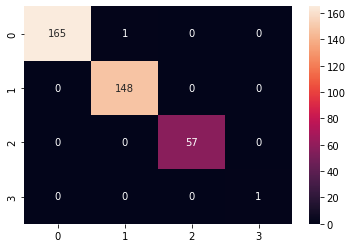

In [80]:
cm=confusion_matrix(y_test,prd)
sns.heatmap(cm,annot=True,fmt='g')

### Model Accuracy Score

In [81]:
print(accuracy_score(y_test,prd))

0.9973118279569892


### Save into pickle file

In [82]:
import pickle

In [83]:
pickle.dump(rf,open('water_model.pkl','wb'))